In [41]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [42]:
#Getting the dataset and splitting it for training and testing the model
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

In [43]:
# Designing a neural network model
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [44]:
# Compiling the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [45]:
# Training the model
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8626 - loss: 0.4772
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9659 - loss: 0.1100
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9778 - loss: 0.0734
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9844 - loss: 0.0513
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9881 - loss: 0.0373
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9902 - loss: 0.0296
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9929 - loss: 0.0224
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9937 - loss: 0.0199
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9948 - loss: 0.0153
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9954 - loss: 0.0139
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9951 - loss: 0.0129
Epoch 12/50
1875/1875 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
This digit is a 0


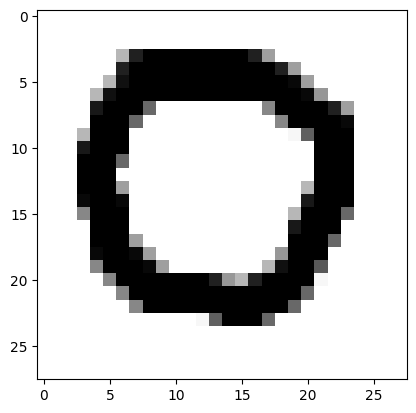

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
This digit is a 3


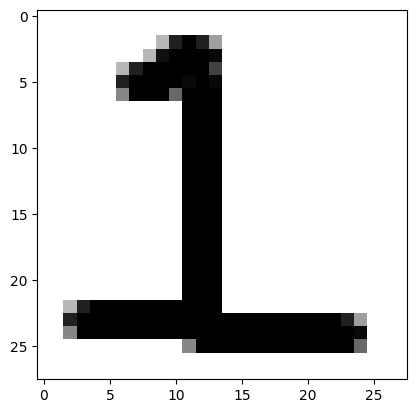

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
This digit is a 2


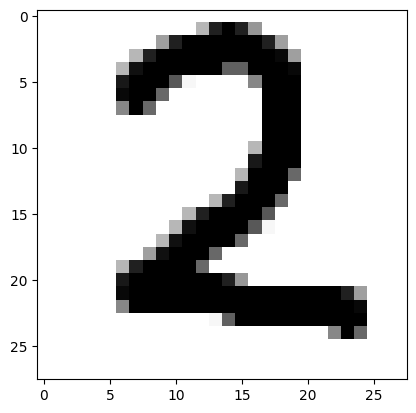

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
This digit is a 3


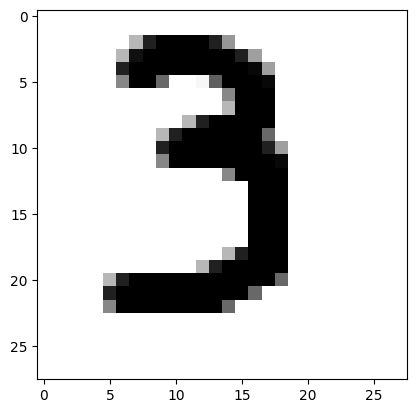

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
This digit is a 3


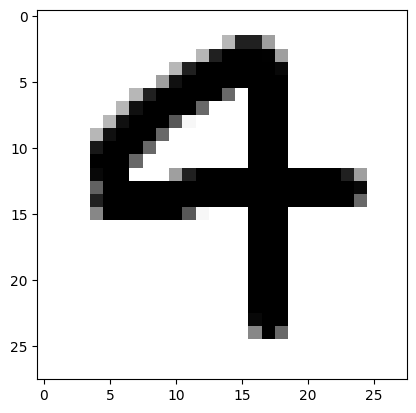

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
This digit is a 5


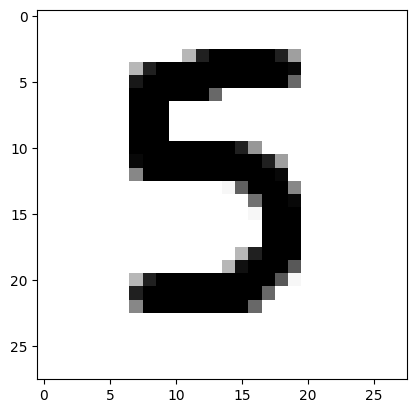

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
This digit is a 6


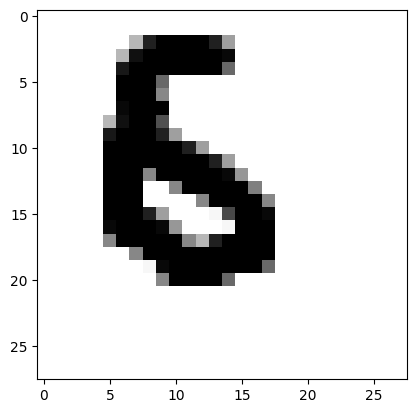

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
This digit is a 7


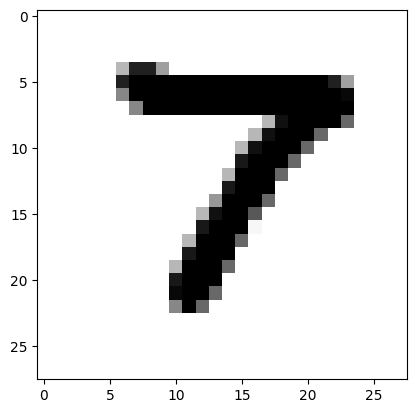

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
This digit is a 8


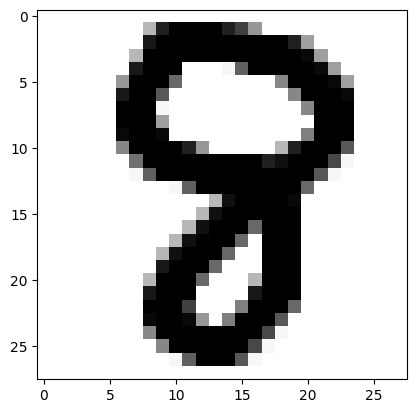

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
This digit is a 3


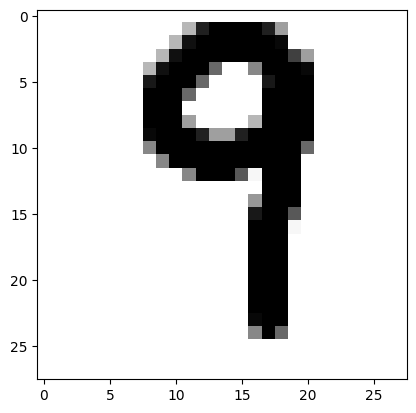

In [47]:
image_number=0
while os.path.isfile(f"samples/d{image_number}.png"):
    try:
        img=cv2.imread(f"samples/d{image_number}.png")[:,:,0]
        img=np.invert(np.array([img]))
        prediction=model.predict(img)
        print(f"This digit is a {np.argmax(prediction)}")
        plt.imshow(img[0],cmap=plt.cm.binary)
        plt.show()
    except:
        print("Error")
    finally:
        image_number+=1